<a href="https://colab.research.google.com/github/muqeetahmaad9/student-performance-internship/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow opencv-python


In [3]:
import kagglehub


path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


In [5]:
from zipfile import ZipFile
import os


from google.colab import files
uploaded = files.upload()

# Extract it
for file in uploaded.keys():
    with ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall("GTSRB")


Saving archive.zip to archive.zip


In [6]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data = []
labels = []
classes = 43
image_size = 32


for i in range(classes):
    path = f"GTSRB/Train/{i}"
    for img in os.listdir(path):
        try:
            image = cv2.imread(os.path.join(path, img))
            image = cv2.resize(image, (image_size, image_size))
            data.append(image)
            labels.append(i)
        except:
            pass

X = np.array(data)
y = to_categorical(np.array(labels), classes)
X = X / 255.0  # Normalize

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data = []
labels = []
classes = 43
image_size = 32

# Read all class folders
for i in range(classes):
    path = f"GTSRB/Train/{i}"
    for img in os.listdir(path):
        try:
            image = cv2.imread(os.path.join(path, img))
            image = cv2.resize(image, (image_size, image_size))
            data.append(image)
            labels.append(i)
        except:
            pass

X = np.array(data)
y = to_categorical(np.array(labels), classes)
X = X / 255.0  # Normalize

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, batch_size=64, epochs=15, validation_data=(X_test, y_test))



Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 44s 84ms/step - accuracy: 0.2999 - loss: 2.6599 - val_accuracy: 0.8776 - val_loss: 0.5417
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.7690 - loss: 0.7507 - val_accuracy: 0.9587 - val_loss: 0.2113
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.8724 - loss: 0.4234 - val_accuracy: 0.9777 - val_loss: 0.1196
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 44s 89ms/step - accuracy: 0.9096 - loss: 0.3003 - val_accuracy: 0.9809 - val_loss: 0.0884
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.9277 - loss: 0.2257 - val_accuracy: 0.9844 - val_loss: 0.0698
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.9350 - loss: 0.2076 - val_accuracy: 0.9878 - val_loss: 0.0648
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.9450 - loss: 0.1724 - val_accuracy: 0.9880 - val_loss: 0.0540
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.9507 - loss: 0.1581 - 

246/246 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.99      1.00      0.99       496
           2       0.99      1.00      0.99       450
           3       0.99      1.00      0.99       280
           4       1.00      0.99      0.99       418
           5       0.96      0.99      0.98       364
           6       1.00      1.00      1.00        59
           7       1.00      0.96      0.98       278
           8       0.99      0.98      0.98       301
           9       1.00      0.99      1.00       268
          10       1.00      1.00      1.00       370
          11       0.99      0.99      0.99       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      0.99      1.00       162
          15       0.97      1.00      0.98       120
          16       1.00      1.00      

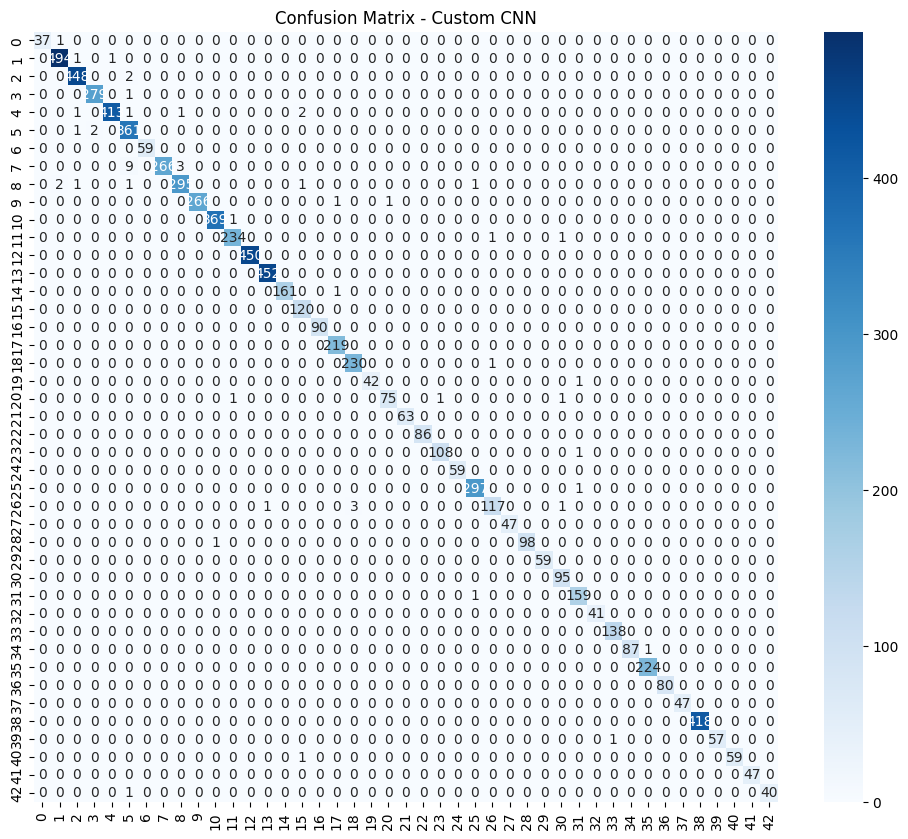

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Custom CNN")
plt.show()


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

aug_model = model
aug_model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 63s 127ms/step - accuracy: 0.6676 - loss: 1.2612 - val_accuracy: 0.9880 - val_loss: 0.0791
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 59s 119ms/step - accuracy: 0.7947 - loss: 0.6570 - val_accuracy: 0.9925 - val_loss: 0.0410
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 80s 115ms/step - accuracy: 0.8417 - loss: 0.5199 - val_accuracy: 0.9930 - val_loss: 0.0383
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 59s 120ms/step - accuracy: 0.8655 - loss: 0.4327 - val_accuracy: 0.9930 - val_loss: 0.0338
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 59s 121ms/step - accuracy: 0.8864 - loss: 0.3631 - val_accuracy: 0.9943 - val_loss: 0.0293
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 58s 119ms/step - accuracy: 0.8978 - loss: 0.3190 - val_accuracy: 0.9946 - val_loss: 0.0250
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 83s 121ms/step - accuracy: 0.9068 - loss: 0.3054 - val_accuracy: 0.9952 - val_loss: 0.0237
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 86s 128ms/step - accuracy: 0.9131 - loss: 0.2795 - val

In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input

base_model = MobileNetV2(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(classes, activation='softmax')(x)
mobilenet_model = Model(inputs=base_model.input, outputs=output)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_model.summary()

# Train
mobilenet_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


/tmp/ipython-input-3266718766.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 16, 16,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 16, 16,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 16, 16,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 16, 16,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 16, 16,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 16, 16,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 17, 17,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 8, 8, 96)  │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │          0 │ block_1_depthwis… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 8, 8, 24)  │      2,304 │ block_1_depthwis

 Total params: 2,427,499 (9.26 MB)

 Trainable params: 169,515 (662.17 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 55s 49ms/step - accuracy: 0.2035 - loss: 2.9592 - val_accuracy: 0.3060 - val_loss: 2.3676
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.3269 - loss: 2.2811 - val_accuracy: 0.3336 - val_loss: 2.2393
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.3580 - loss: 2.1563 - val_accuracy: 0.3486 - val_loss: 2.1564
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.3797 - loss: 2.0723 - val_accuracy: 0.3639 - val_loss: 2.1032
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 49s 50ms/step - accuracy: 0.3934 - loss: 2.0058 - val_accuracy: 0.3806 - val_loss: 2.0669
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.4156 - loss: 1.9384 - val_accuracy: 0.3794 - val_loss: 2.0435
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.4269 - loss: 1.8960 - val_accuracy: 0.3916 - val_loss: 1.9991
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.4330 - loss: 1.8630 - 